In [84]:
import pandas as pd
import geopandas as gpd
import folium

In [85]:
cities = gpd.read_file('data/Shrinking_Cities.shp')

In [86]:
# .shape will return the dimensions of the dataframe, as well as the number of elements in each dimenstion.

In [87]:
cities.shape

(8, 3)

In [88]:
# The dataframe has 8 rows, 3 columns.

In [89]:
# .info will return various pieces of information about the table.

In [90]:
cities.info

<bound method DataFrame.info of    id       Cities                         geometry
0   1       Altena   POINT (854023.524 6674254.537)
1   2      Melgaco  POINT (-919414.317 5177921.190)
2   3      Manresa   POINT (203598.734 5120434.652)
3   4       Idrija  POINT (1561490.861 5780715.211)
4   5      Aluksne  POINT (3011217.176 7846561.496)
5   6    Nyirbator  POINT (2463620.342 6080186.087)
6   7      Isernia  POINT (1584993.645 5101259.282)
7   8  Igoumenitsa  POINT (2255832.260 4794186.557)>

In [91]:
# Information about the dataframe.

In [92]:
# Shows the first 5 rows of the dataframe.

In [93]:
cities.head()

,id,Cities,geometry
0,1,Altena,POINT (854023.524 6674254.537)
1,2,Melgaco,POINT (-919414.317 5177921.190)
2,3,Manresa,POINT (203598.734 5120434.652)
3,4,Idrija,POINT (1561490.861 5780715.211)
4,5,Aluksne,POINT (3011217.176 7846561.496)


In [94]:
# Plots the dataframe based on geography data within.

<AxesSubplot: >

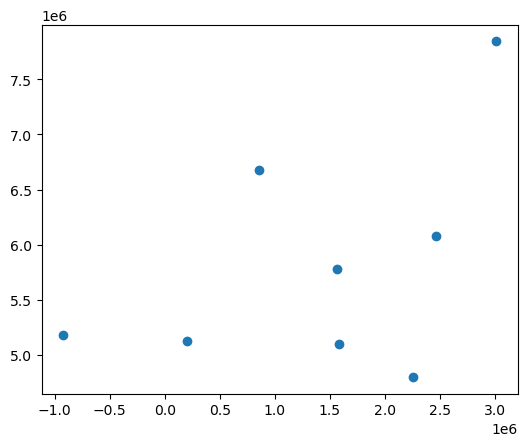

In [95]:
cities.plot()

In [96]:
# Plots the cities on a spatial plane.

<AxesSubplot: >

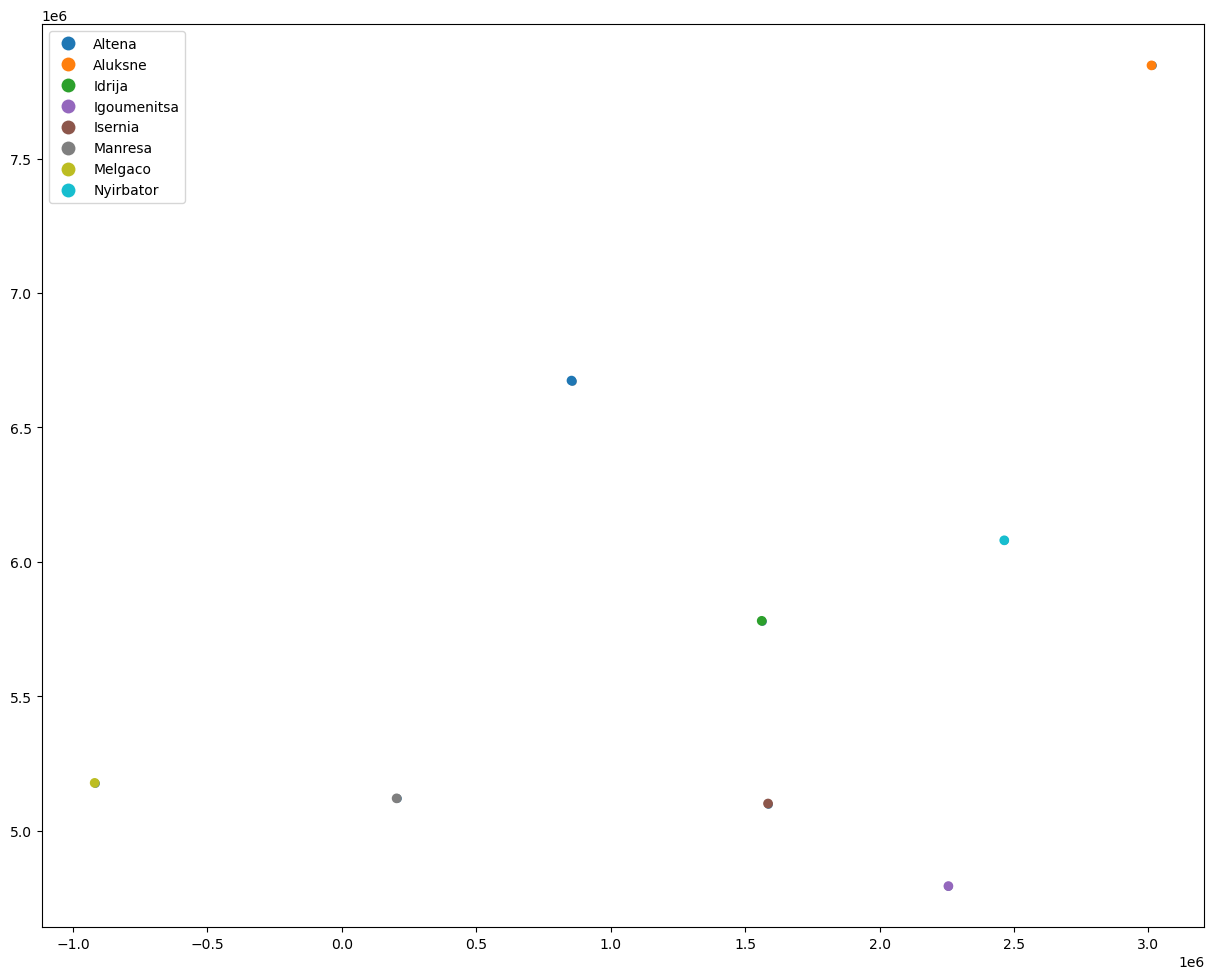

In [97]:
ax = cities.plot(edgecolor = 'black', linewidth = 0.1, figsize = (15,15))
cities.plot(ax = ax, column = 'Cities', legend = True)

In [98]:
m = folium.Map()
m

In [99]:
cities.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [100]:
cities = cities.to_crs(epsg = 4326)
print(cities.crs)
cities.head()

EPSG:4326


,id,Cities,geometry
0,1,Altena,POINT (7.67182 51.29844)
1,2,Melgaco,POINT (-8.25924 42.11300)
2,3,Manresa,POINT (1.82896 41.72876)
3,4,Idrija,POINT (14.02711 46.00228)
4,5,Aluksne,POINT (27.05022 57.42053)


In [101]:
for index, row in cities.iterrows():
    print(row.Cities, row.geometry)

Altena POINT (7.671823847810156 51.29843707535939)
Melgaco POINT (-8.259239330935474 42.11299890731406)
Manresa POINT (1.8289585499973406 41.728756289847404)
Idrija POINT (14.027111067364231 46.002283816276766)
Aluksne POINT (27.050224134114156 57.42052974378081)
Nyirbator POINT (22.13107807897624 47.839447655551595)
Isernia POINT (14.23824016791077 41.60007284428459)
Igoumenitsa POINT (20.26448597996787 39.50442984022387)


In [121]:
cities['LAT'] = cities['geometry'].astype(str).apply(lambda x: float(x.extract('(\d+\.\d+)')[0]))

AttributeError: 'str' object has no attribute 'extract'

In [112]:
cities['LAT']

0    POINT
1    POINT
2    POINT
3    POINT
4    POINT
5    POINT
6    POINT
7    POINT
Name: LAT, dtype: object

In [122]:
cities['LAT'] = cities['geometry'].apply(lambda x: x.y)

In [123]:
cities['LONG'] = cities['geometry'].apply(lambda x: x.x)

In [124]:
cities(head)

NameError: name 'head' is not defined

In [125]:
cities.head()

,id,Cities,geometry,LAT,LONG
0,1,Altena,POINT (7.67182 51.29844),51.298437,7.671824
1,2,Melgaco,POINT (-8.25924 42.11300),42.112999,-8.259239
2,3,Manresa,POINT (1.82896 41.72876),41.728756,1.828959
3,4,Idrija,POINT (14.02711 46.00228),46.002284,14.027111
4,5,Aluksne,POINT (27.05022 57.42053),57.420530,27.050224


In [126]:
for index, row in cities.iterrows():
    print(row.Cities, row.LAT, row.LONG)

Altena 51.29843707535939 7.671823847810156
Melgaco 42.11299890731406 -8.259239330935474
Manresa 41.728756289847404 1.8289585499973406
Idrija 46.002283816276766 14.027111067364231
Aluksne 57.42052974378081 27.050224134114156
Nyirbator 47.839447655551595 22.13107807897624
Isernia 41.60007284428459 14.23824016791077
Igoumenitsa 39.50442984022387 20.26448597996787


In [127]:
for index, row in cities():

SyntaxError: incomplete input (3911305588.py, line 1)

In [130]:
for index, row in cities.iterrows():
    folium.Marker([row.LAT, row.LONG], popup = row.Cities, tooltip = row.Cities).add_to(m)
m

In [131]:
m.save('cities_map.html')